# <p style="color:red">Telecom Churn Case Study</p>

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
pd.set_option('Display.max_columns', None)

## <p style="color:purple">1. Data Understanding</p>

In [3]:
# read data
data = pd.read_csv('telecom_churn_data.csv')
print(data.shape)
data.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# info about data
data.info(max_cols= 226)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
# describe data
round(data.describe(), 1)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.0,99999.0,99999.0,99999.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,99999.0,99999.0,99999.0,99999.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,96062.0,961

## <p style="color:purple">2. Data Cleaning</p>

In [6]:
# dropping the redundant and unwanted features
col = ['circle_id', 'mobile_number', 
       'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
data.drop(col, axis=1, inplace=True)

In [7]:
# check null value
round( (data.isnull().sum() / data.shape[0] * 100)[data.isnull().sum() > 0].sort_values(ascending=False), 2)

count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
                            ...  
loc_ic_t2m_mou_7             3.86
loc_og_t2f_mou_7             3.86
loc_ic_mou_7                 3.86
loc_og_t2m_mou_7             3.86
loc_ic_t2f_mou_7             3.86
Length: 156, dtype: float64

- **Drop column which has more than 50% null values.**

In [8]:
# droping column
col = (data.isnull().sum() / data.shape[0] * 100)[(data.isnull().sum() / data.shape[0] * 100) > 50].index
data.drop(col, axis=1, inplace=True)
data.shape

(99999, 173)

In [9]:
# head of data
data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1

In [10]:
# drop row if it has more than 50% null value
data = data[round(data.isnull().sum(axis=1) / data.shape[1] *100, 2) < 50]
data.shape

(97525, 173)

In [11]:
# fill null values with median
print('Before filling null value: ', sum(data.isnull().sum()))
data = data.fillna(data.median())
print('After filling null value: ', sum(data.isnull().sum()))

Before filling null value:  361891
After filling null value:  0


## <p style="color:purple">3. Filtering Data</p>

- **Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

In [12]:
# filter data
data['avg_rech_amt'] = round((data['total_rech_amt_6'] + data['total_rech_amt_7']) / 2, 2)
X = data['avg_rech_amt'].quantile(0.70)
data = data[data['avg_rech_amt'] > X]
data.drop('avg_rech_amt', axis=1, inplace=True)
print(data.shape)

(29249, 173)


- **Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.**

In [13]:
data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sample(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
11736,472.34,260.96,62.51,2825.47
57948,335.33,1101.26,0.00,0.00
81936,0.00,0.00,0.00,0.00
59539,53.13,672.18,0.11,0.00
15712,292.54,32.26,1073.43,0.00
29908,287.54,213.08,0.00,0.00
1917,5.98,117.28,0.00,0.00
86771,317.08,402.23,0.00,0.00
71775,319.01,1457.63,0.00,0.00
82396,612.06,258.68,57.95,1071.89


In [14]:
# tag customer with 1 or 0
tag = (
    (data['total_ic_mou_9'] == 0) | (data['total_og_mou_9'] == 0)) & (
    (data['vol_2g_mb_9'] == 0) & (data['vol_3g_mb_9'] == 0))
data['churn'] = tag.apply(lambda x: 1 if x else 0)
data['churn'].value_counts()

0    26566
1     2683
Name: churn, dtype: int64

In [15]:
# columns which are belong to month 9
col = []
for i in data.columns:
    if '9' in i:
        col.append(i)
print(col)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [16]:
# drop columns
data.drop(col, axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(29249, 132)

## <p style="color:purple">4. Exploratory Data Analysis</p>

### <p style="color:hotpink">Univariate Analysis</p>

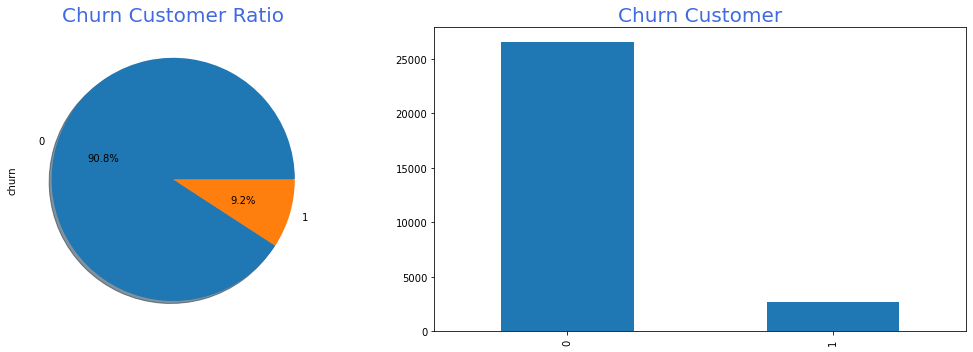

In [17]:
# piechart
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.title('Churn Customer Ratio', fontdict={'color':'royalblue', 'size':20})
data['churn'].value_counts(normalize=True).plot.pie(shadow=True, autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title('Churn Customer', fontdict={'color':'royalblue', 'size':20})
data['churn'].value_counts().plot.bar()

plt.tight_layout()
plt.show()

- **Here, data are `imbalance`. Majority of customers are belonging towards `non-churn` class.**

#### **`Histogram`**

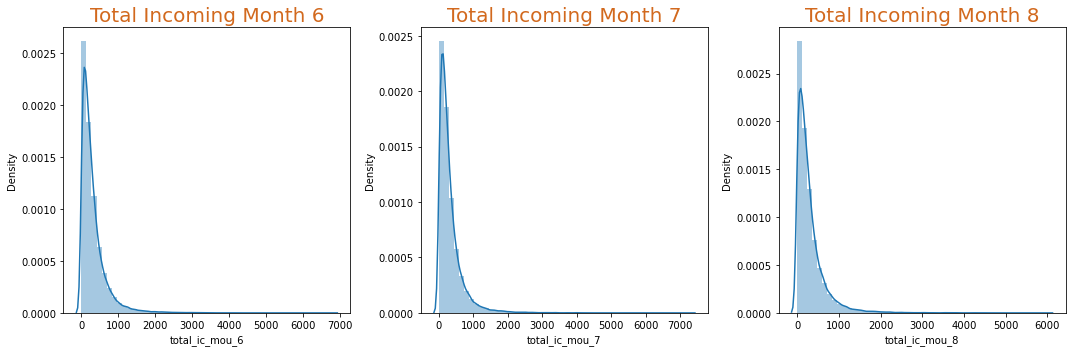

In [18]:
# Histogram
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(data['total_ic_mou_6'])
plt.title('Total Incoming Month 6', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,2)
sns.distplot(data['total_ic_mou_7'])
plt.title('Total Incoming Month 7', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,3)
sns.distplot(data['total_ic_mou_8'])
plt.title('Total Incoming Month 8', fontdict={'size':20, 'color':'chocolate'})

plt.tight_layout()
plt.show()

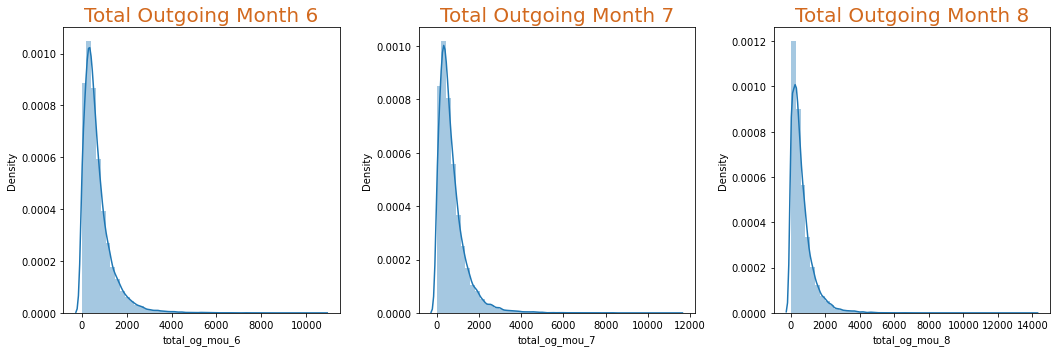

In [19]:
# Histogram
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(data['total_og_mou_6'])
plt.title('Total Outgoing Month 6', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,2)
sns.distplot(data['total_og_mou_7'])
plt.title('Total Outgoing Month 7', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,3)
sns.distplot(data['total_og_mou_8'])
plt.title('Total Outgoing Month 8', fontdict={'size':20, 'color':'chocolate'})

plt.tight_layout()
plt.show()

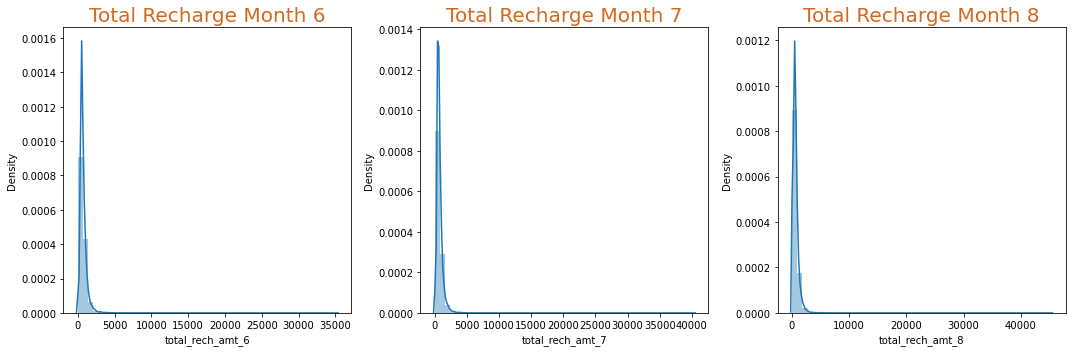

In [20]:
# Histogram
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(data['total_rech_amt_6'])
plt.title('Total Recharge Month 6', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,2)
sns.distplot(data['total_rech_amt_7'])
plt.title('Total Recharge Month 7', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,3)
sns.distplot(data['total_rech_amt_8'])
plt.title('Total Recharge Month 8', fontdict={'size':20, 'color':'chocolate'})

plt.tight_layout()
plt.show()

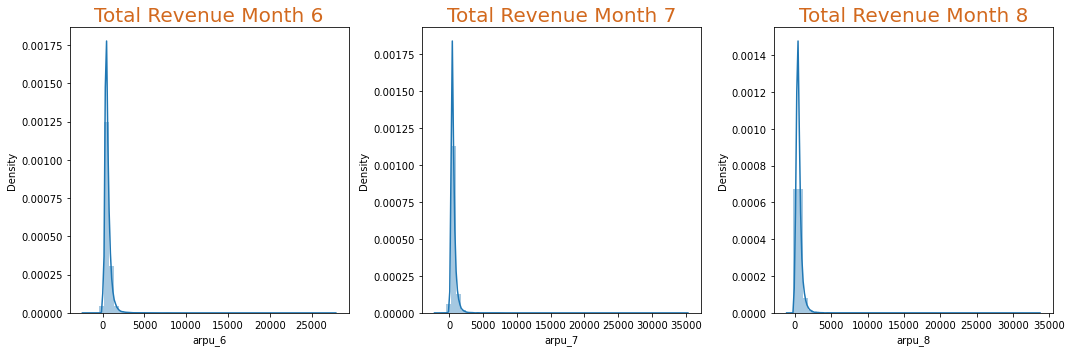

In [21]:
# Histogram
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.distplot(data['arpu_6'])
plt.title('Total Revenue Month 6', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,2)
sns.distplot(data['arpu_7'])
plt.title('Total Revenue Month 7', fontdict={'size':20, 'color':'chocolate'})

plt.subplot(1,3,3)
sns.distplot(data['arpu_8'])
plt.title('Total Revenue Month 8', fontdict={'size':20, 'color':'chocolate'})

plt.tight_layout()
plt.show()

- **Attributes are normally distributed.**

#### **`Boxplot`**

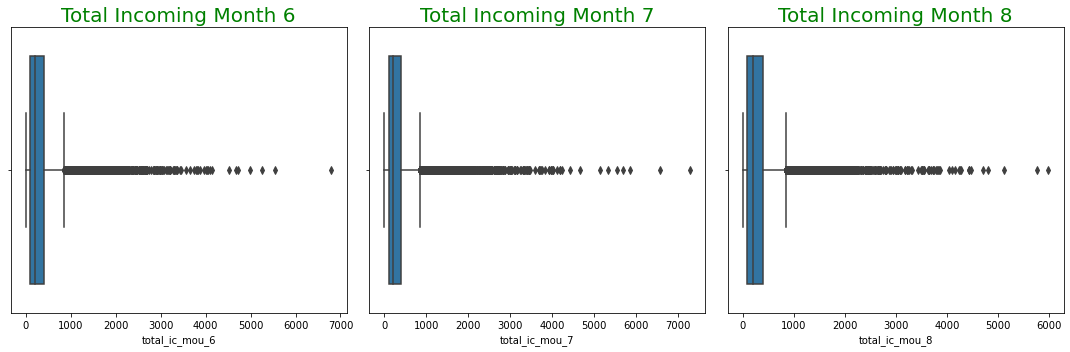

In [22]:
# boxplot
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(data['total_ic_mou_6'], orient='v')
plt.title('Total Incoming Month 6', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,2)
sns.boxplot(data['total_ic_mou_7'], orient='v')
plt.title('Total Incoming Month 7', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,3)
sns.boxplot(data['total_ic_mou_8'], orient='v')
plt.title('Total Incoming Month 8', fontdict={'size':20, 'color':'green'})

plt.tight_layout()
plt.show()

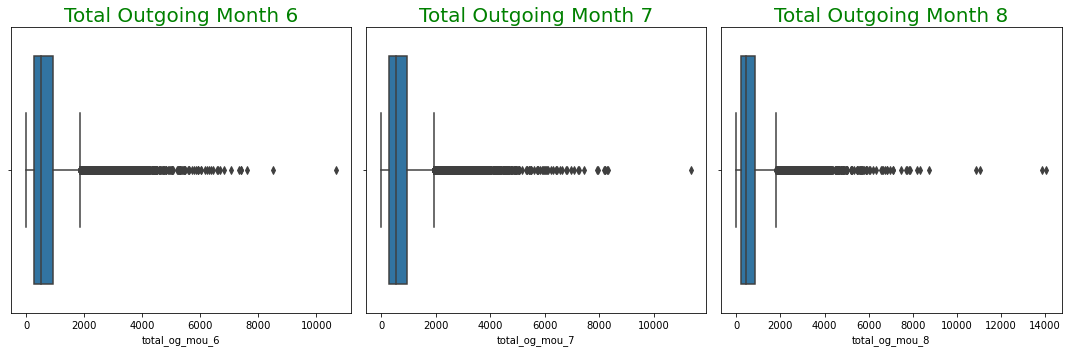

In [23]:
# boxplot
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(data['total_og_mou_6'], orient='v')
plt.title('Total Outgoing Month 6', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,2)
sns.boxplot(data['total_og_mou_7'], orient='v')
plt.title('Total Outgoing Month 7', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,3)
sns.boxplot(data['total_og_mou_8'], orient='v')
plt.title('Total Outgoing Month 8', fontdict={'size':20, 'color':'green'})

plt.tight_layout()
plt.show()

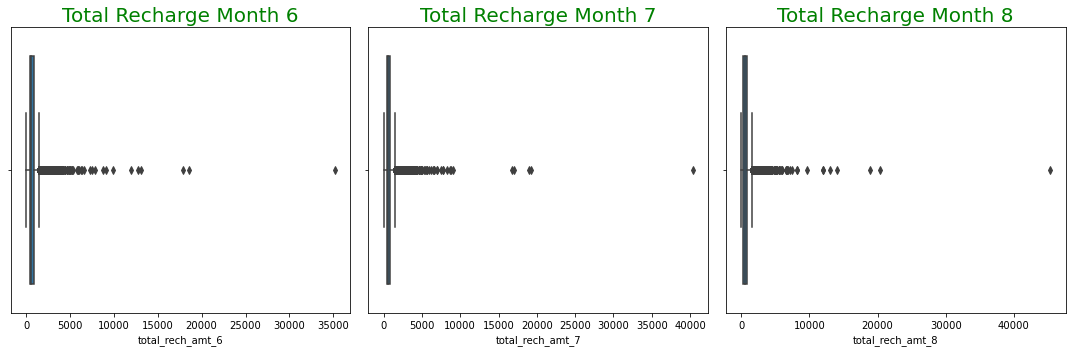

In [24]:
# boxplot
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(data['total_rech_amt_6'], orient='v')
plt.title('Total Recharge Month 6', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,2)
sns.boxplot(data['total_rech_amt_7'], orient='v')
plt.title('Total Recharge Month 7', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,3)
sns.boxplot(data['total_rech_amt_8'], orient='v')
plt.title('Total Recharge Month 8', fontdict={'size':20, 'color':'green'})

plt.tight_layout()
plt.show()

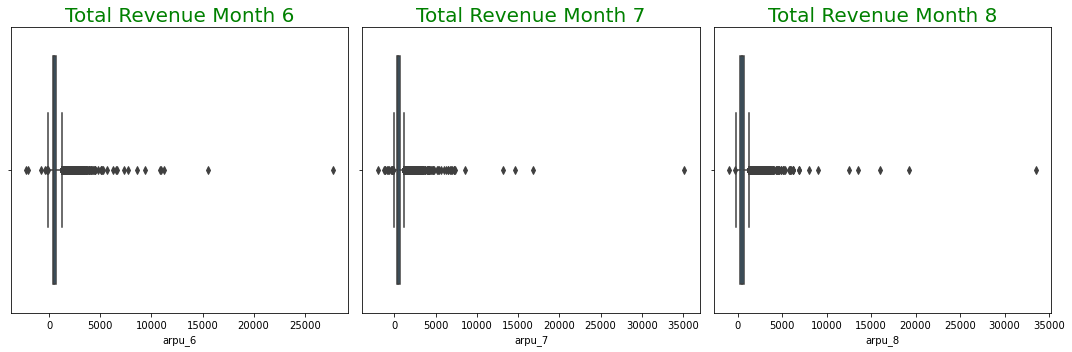

In [25]:
# boxplot
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.boxplot(data['arpu_6'], orient='v')
plt.title('Total Revenue Month 6', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,2)
sns.boxplot(data['arpu_7'], orient='v')
plt.title('Total Revenue Month 7', fontdict={'size':20, 'color':'green'})

plt.subplot(1,3,3)
sns.boxplot(data['arpu_8'], orient='v')
plt.title('Total Revenue Month 8', fontdict={'size':20, 'color':'green'})

plt.tight_layout()
plt.show()

- **Most of column has outliers. So, lets handle through soft capping technique...**

In [26]:
# Create a function to handle outliers....
def soft_cap(x):
  lower_cap = x.mean() - 3*x.std()
  Upper_cap = x.mean() + 3*x.std()

  x[x<lower_cap] = lower_cap
  x[x>Upper_cap] = Upper_cap
  return x

In [27]:
# Lets drop some redandunt features..
data.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],1,inplace=True)

In [28]:
col = [i for i in data.columns if 'churn' not in i]

In [29]:
# apply over all independent features...
data[col] = data[col].apply(soft_cap)

### <p style="color:hotpink">Bivariate Analysis</p>

- Average ***`Revenue`, `Roaming incoming`, `Roaming outgoing`, `Total outgoing`, `Total incoming`, `Total recharge amount`.***

#### **`Barplot`**

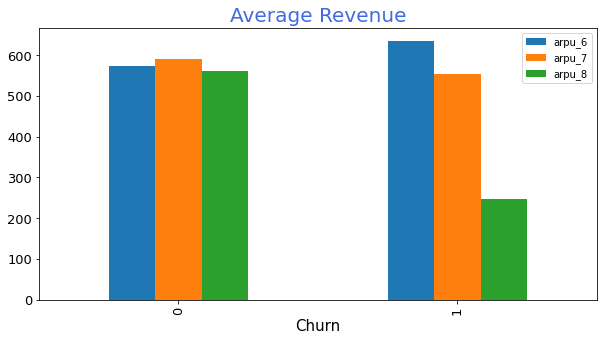

In [30]:
# barplot
data.groupby('churn')['arpu_6', 'arpu_7', 'arpu_8'].mean().plot.bar(figsize=[10,5])
plt.title('Average Revenue', fontdict={'color':'royalblue', 'size':20})
plt.xlabel('Churn',fontdict={'size':15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

- **For `month 8` churn customer's `Average Revenue per Customer` is decreasing a lot compare to non-churn customer.**

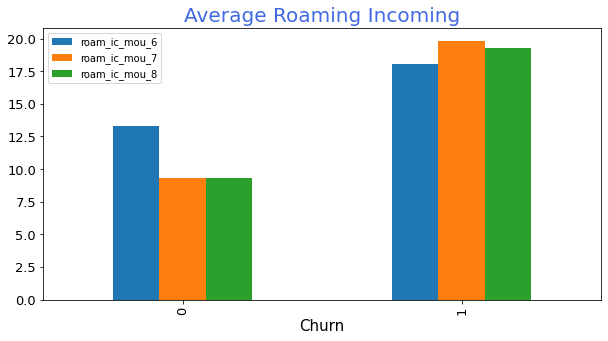

In [31]:
# barplot
data.groupby('churn')['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean().plot.bar(figsize=[10,5])
plt.title('Average Roaming Incoming', fontdict={'color':'royalblue', 'size':20})
plt.xlabel('Churn',fontdict={'size':15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

- **For churn customer `Average Roaming Incoming` is very high.**

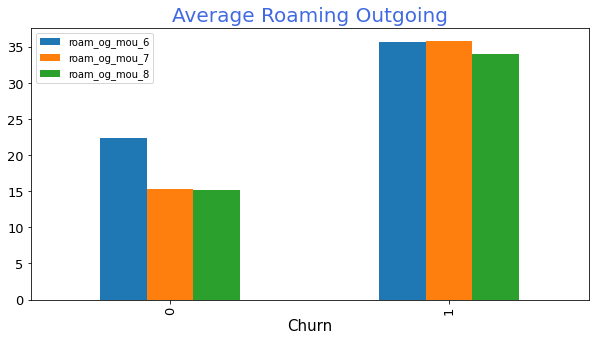

In [32]:
# barplot
data.groupby('churn')['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean().plot.bar(figsize=[10,5])
plt.title('Average Roaming Outgoing', fontdict={'color':'royalblue', 'size':20})
plt.xlabel('Churn',fontdict={'size':15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

- **For churn customer `Average Roaming Outgoing` is very high.**

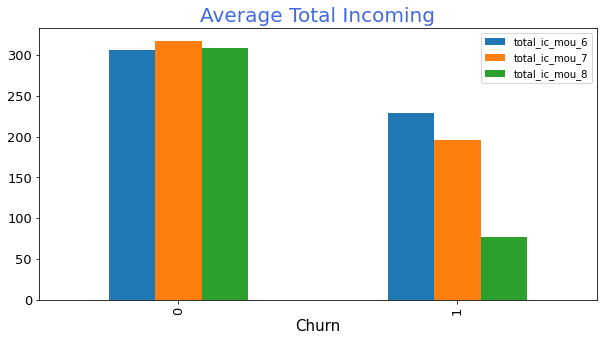

In [33]:
# barplot
data.groupby('churn')['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].mean().plot.bar(figsize=[10,5])
plt.title('Average Total Incoming', fontdict={'color':'royalblue', 'size':20})
plt.xlabel('Churn',fontdict={'size':15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

- **For month 8 churn customer's `Average Total Incoming` decreasing a lot compare to non-churn customer.**

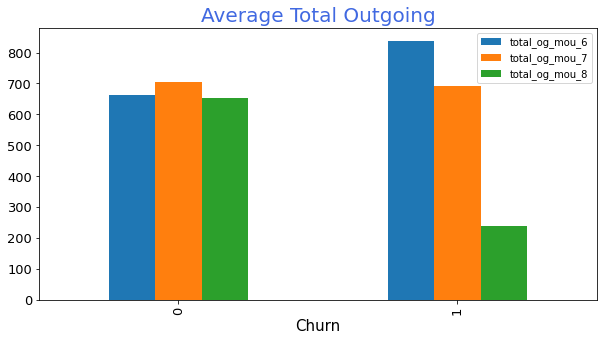

In [34]:
# barplot
data.groupby('churn')['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'].mean().plot.bar(figsize=[10,5])
plt.title('Average Total Outgoing', fontdict={'color':'royalblue', 'size':20})
plt.xlabel('Churn',fontdict={'size':15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

- **For month 8 churn customer's `Average Total Outgoing` decreasing a lot compare to non-churn customer.**

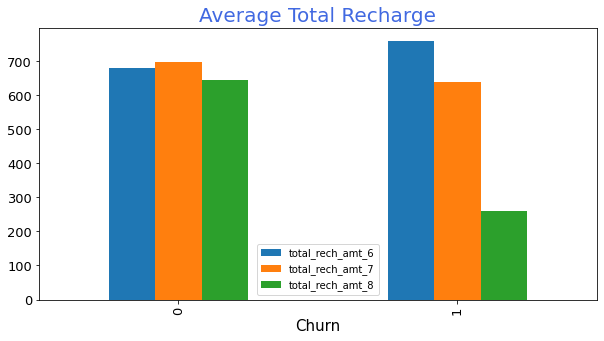

In [35]:
# barplot
data.groupby('churn')['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'].mean().plot.bar(figsize=[10,5])
plt.title('Average Total Recharge', fontdict={'color':'royalblue', 'size':20})
plt.xlabel('Churn',fontdict={'size':15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

- **For month 8 churn customer's `Average Total Recharge` decreasing a lot compare to non-churn customer.**

### <p style="color:hotpink">Multivariate Analysis</p>

#### **`Scatterplot`**

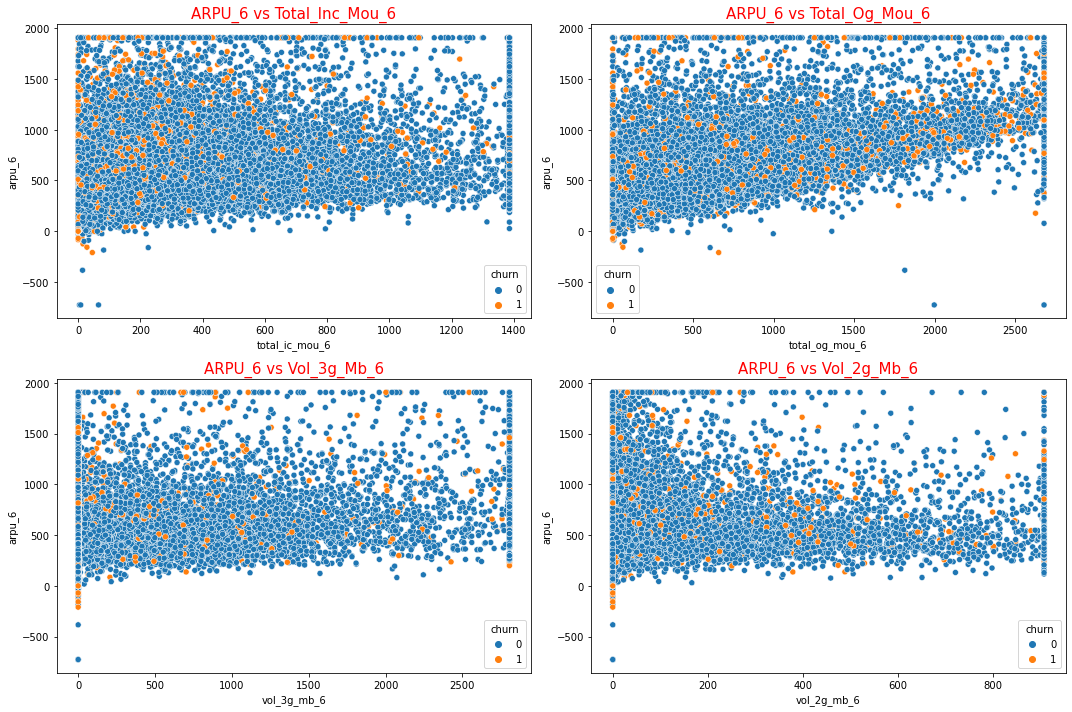

In [36]:
plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
sns.scatterplot(x=data['total_ic_mou_6'], y=data['arpu_6'], hue=data['churn'])
plt.title('ARPU_6 vs Total_Inc_Mou_6', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,2)
sns.scatterplot(x=data['total_og_mou_6'], y=data['arpu_6'], hue=data['churn'])
plt.title('ARPU_6 vs Total_Og_Mou_6', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,3)
sns.scatterplot(x=data['vol_3g_mb_6'], y=data['arpu_6'], hue=data['churn'])
plt.title('ARPU_6 vs Vol_3g_Mb_6', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,4)
sns.scatterplot(x=data['vol_2g_mb_6'], y=data['arpu_6'], hue=data['churn'])
plt.title('ARPU_6 vs Vol_2g_Mb_6', fontdict={'size':15, 'color':'red'})

plt.tight_layout()
plt.show()

#### From here, it showing that customers who get churned are actually not used much internet facility, that results in low revenue ...

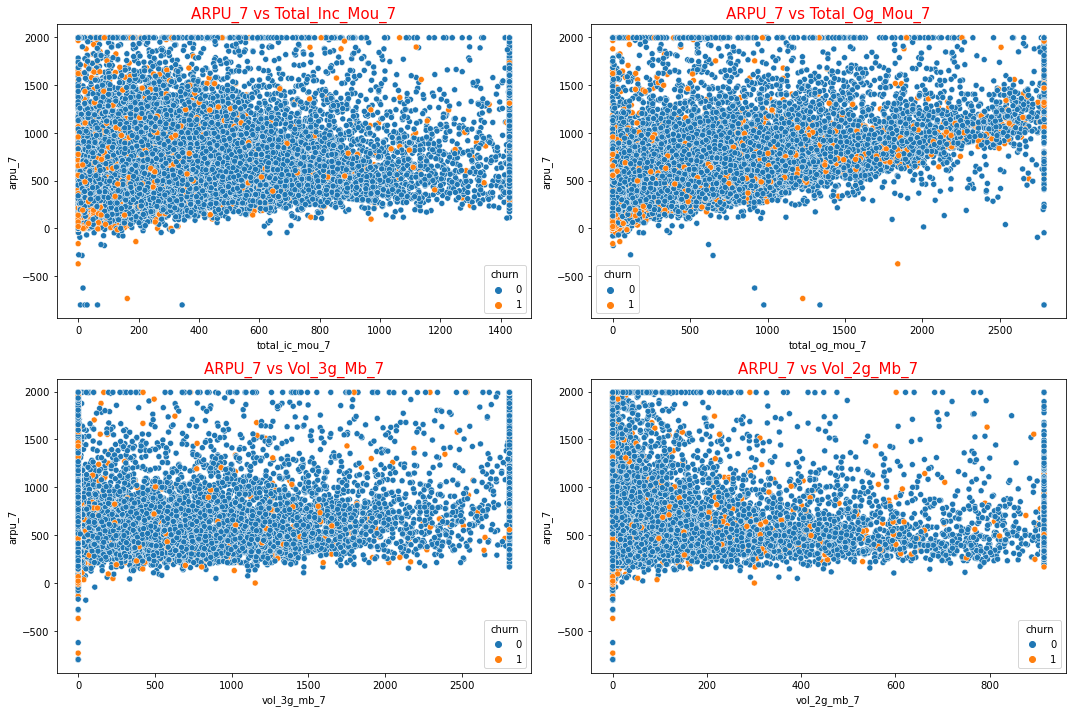

In [37]:
plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
sns.scatterplot(x=data['total_ic_mou_7'], y=data['arpu_7'], hue=data['churn'])
plt.title('ARPU_7 vs Total_Inc_Mou_7', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,2)
sns.scatterplot(x=data['total_og_mou_7'], y=data['arpu_7'], hue=data['churn'])
plt.title('ARPU_7 vs Total_Og_Mou_7', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,3)
sns.scatterplot(x=data['vol_3g_mb_7'], y=data['arpu_7'], hue=data['churn'])
plt.title('ARPU_7 vs Vol_3g_Mb_7', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,4)
sns.scatterplot(x=data['vol_2g_mb_7'], y=data['arpu_7'], hue=data['churn'])
plt.title('ARPU_7 vs Vol_2g_Mb_7', fontdict={'size':15, 'color':'red'})

plt.tight_layout()
plt.show()

### Customers with very low incoming calls are having probability for getting churned..

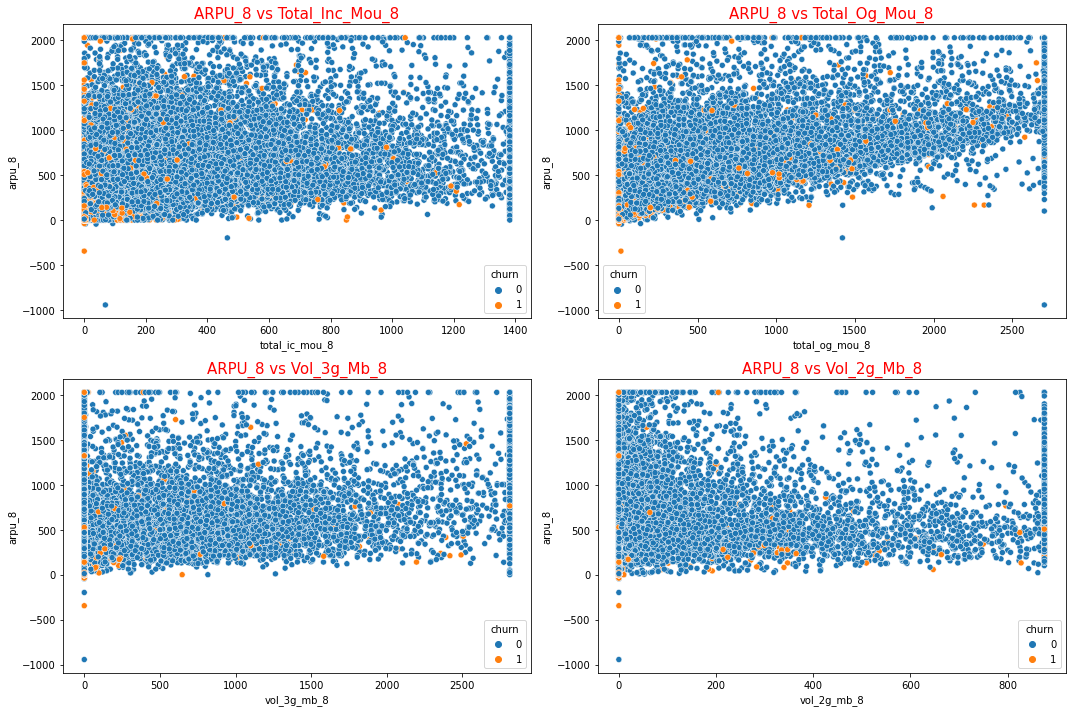

In [38]:
plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
sns.scatterplot(x=data['total_ic_mou_8'], y=data['arpu_8'], hue=data['churn'])
plt.title('ARPU_8 vs Total_Inc_Mou_8', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,2)
sns.scatterplot(x=data['total_og_mou_8'], y=data['arpu_8'], hue=data['churn'])
plt.title('ARPU_8 vs Total_Og_Mou_8', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,3)
sns.scatterplot(x=data['vol_3g_mb_8'], y=data['arpu_8'], hue=data['churn'])
plt.title('ARPU_8 vs Vol_3g_Mb_8', fontdict={'size':15, 'color':'red'})

plt.subplot(2,2,4)
sns.scatterplot(x=data['vol_2g_mb_8'], y=data['arpu_8'], hue=data['churn'])
plt.title('ARPU_8 vs Vol_2g_Mb_8', fontdict={'size':15, 'color':'red'})

plt.tight_layout()
plt.show()

### Customers who are utilising the outgoing calls very rarly in the action phase are getting churned..

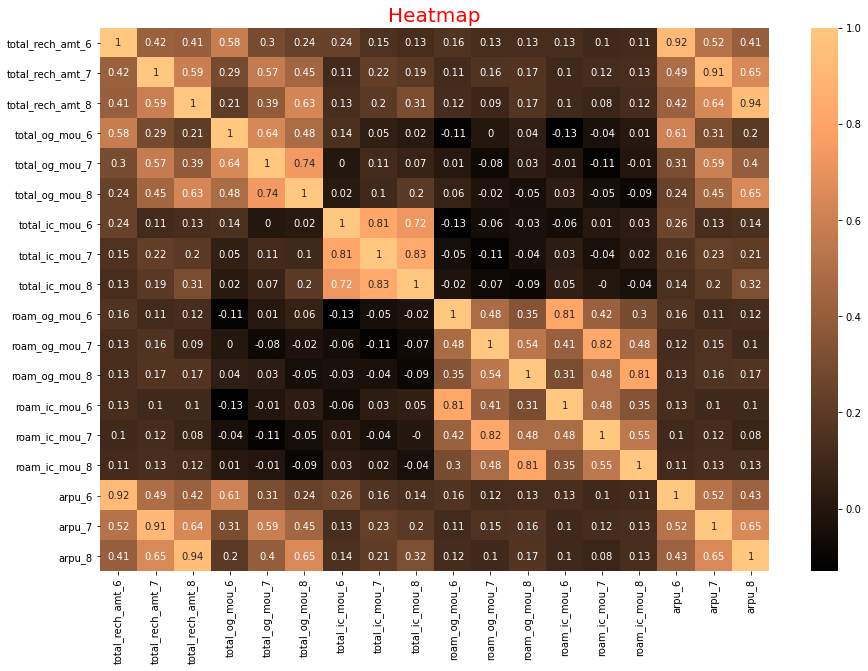

In [39]:
# heatmap
col = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
       'arpu_6', 'arpu_7', 'arpu_8']

plt.figure(figsize=[15,10])
sns.heatmap(data[col].corr().round(2), annot=True, cmap='copper')
plt.title('Heatmap', fontdict={'size':20, 'color':'red'})
plt.show()

- **We can see `multicollinearity` available in data.**

## <p style="color:purple">5. Data Preparation</p>

In [40]:
# head of data
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,1069.180,1349.850,2027.252713,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.060000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2438.541038,688.527999,718.726861,680.497202,0.0,0.0,530.845845,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1
1,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.000000,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,0
2,492.846,205.671,593.260000,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,213.069143,62.11,238.829559,43.449681,16.24,21.44,6.0,4.0,11.0,507.0,253.0,717.000000,110.000000,110.000000,130.000000,110.0,50.0,0.000000,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.

In [41]:
# create churn series
churn = data['churn'].copy()
data.drop('churn', axis=1, inplace=True)

## <p style="color:hotpink">Scaling Data</p>

In [42]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scale_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.682114,0.769997,1.000000,0.034219,0.030936,0.031069,0.246532,0.298469,0.178849,0.063274,0.136598,0.131915,0.061181,0.039392,0.110473,0.063405,0.036951,0.050465,0.329317,0.490593,0.184587,0.819869,0.727796,0.783675,0.0,0.0,0.000000,0.294928,0.374741,0.186574,0.003006,0.015522,0.008474,0.034339,0.020574,0.033985,0.167547,0.471606,0.44878,0.027313,0.031961,0.034987,0.0,0.001278,0.072436,0.072662,0.000000,0.085603,0.000000,0.0,0.0,0.181883,0.218691,0.129495,0.107381,0.055906,0.050791,0.263918,0.269868,0.150731,0.988131,0.611938,0.269089,0.363242,0.296412,0.162474,0.144921,0.043149,0.129353,0.271727,0.360218,0.404474,0.827629,0.529882,0.345707,0.380517,0.342986,0.407996,0.451939,0.390458,0.310176,0.321563,0.0,0.0,0.009668,0.059392,0.132270,0.362258,0.314549,0.374843,0.122289,0.122127,0.180044,0.683535,0.329247,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.154718,0.044137,0.014186,0.014532,0.0
1,0.419678,0.462703,0.363840,0.244747,0.198600,0.020843,0.051467,0.042432,0.074896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366597,0.256219,0.015648,0.086387,0.077397,0.057487,0.000000,0.000000,0.000000,0.0,0.0,0.296395,0.264140,0.202268,0.045982,0.081487,0.088927,0.015932,0.009423,0.006504,0.052347,0.000000,0.000000,0.00000,0.058460,0.061030,0.044175,0.0,0.000000,0.000000,0.000000,0.000000,0.134725,0.000000,0.0,0.0,0.189654,0.154947,0.063446,0.044031,0.017052,0.000577,0.069849,0.017034,0.019253,0.000000,0.000000,0.000000,0.069129,0.019884,0.013643,0.000000,0.002116,0.000426,0.066654,0.011573,0.001860,0.000000,0.000000,0.000000,0.047275,0.009235,0.001578,0.074926,0.019934,0.011966,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.464697,0.512934,0.360087,0.189054,0.250478,0.049210,0.130714,0.214268,0.044085,0.095146,0.000000,0.018838,0.0,0.388815,0.000034,0.0,0.267061,0.004245,0.0,0.769394,0.0,0.0,0.158573,0.486632,0.0,0.0,0.0,0.0,0.0,0.0,0.033580,0.016076,0.666566,0.094729,0.0
2,0.463055,0.360030,0.517301,0.296851,0.061323,0.317425,0.224718,0.062771,0.264759,0.091734,0.588321,0.300645,0.020565,0.110322,0.004180,0.061233,

## <p style="color:hotpink">Train Test Split</p>

In [43]:
# create x_train, y_train, x_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, churn, test_size=0.3, random_state=42)
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('0: ', y_train[y_train==0].shape)
print('1: ', y_train[y_train==1].shape)

print('Ration for train: ', round(y_train[y_train==0].shape[0] / y_train[y_train==1].shape[0], 2))

print('-'*50)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

print('0: ', y_test[y_test==0].shape)
print('1: ', y_test[y_test==1].shape)

print('Ration for test: ', round(y_test[y_test==0].shape[0] / y_test[y_test==1].shape[0], 2))

X_train:  (20474, 125)
y_train:  (20474,)
0:  (18599,)
1:  (1875,)
Ration for train:  9.92
--------------------------------------------------
X_test:  (8775, 125)
y_test:  (8775,)
0:  (7967,)
1:  (808,)
Ration for test:  9.86


## <p style="color:hotpink">PCA</p>

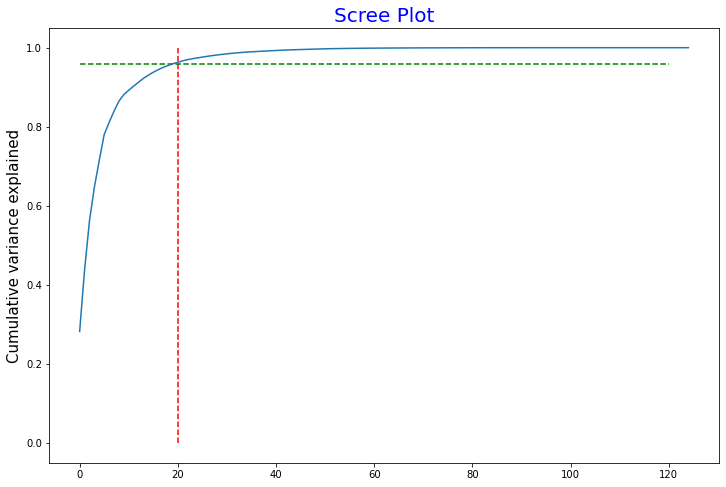

In [44]:
# use pca for dimensions reduction and multicollinearity
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

pca = PCA(random_state=42)
pca.fit(X_train)

# scree plot
fig = plt.figure(figsize=[12,8])

plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=120, xmin=0, colors="g", linestyles="--")

plt.title('Scree Plot', fontdict={'size':20, 'color':'blue'})

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained", fontdict={'size':15})

plt.show()

In [45]:
# reduce dimensions
pca = IncrementalPCA(n_components=20)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca: ', X_train_pca.shape)
print('-'*50)
print('X_test_pca: ', X_test_pca.shape)

X_train_pca:  (20474, 20)
--------------------------------------------------
X_test_pca:  (8775, 20)


## <p style="color:hotpink">Resampling</p>

In [56]:
from imblearn.over_sampling import SMOTE
over = SMOTE(random_state=100)
X_train_res,y_train_res = over.fit_resample(X_train,y_train)


ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

## <p style="color:hotpink">PCA and Resampling</p>

In [ ]:
# reduce dimensions
pca = IncrementalPCA(n_components=20)

X_train_res_pca = pca.fit_transform(X_train_res)
X_test_res_pca = pca.transform(X_test)

print('X_train_res_pca: ', X_train_res_pca.shape)
print('-'*50)
print('X_test_res_pca: ', X_test_res_pca.shape)

## <p style="color:hotpink">Business Understanding</p>

- **In this case two type of Error possible.**
- **churn = 1, non-churn = 0**

1. **predict churn customer but it is  non-churn `(FP)`**
2. **predict non-churn customer but it is churn `(FN)`**

- **In type 1 error if we predict churn but customer is not churning then it is good for company.**
- **But, in sceond type error we predict non-churn and customer is churning then we losing customer.**
- **We will try to increase recall value.**


In [ ]:
model_name = []

train_recall = []
train_accuracy = []
train_roc_auc_score = []

test_recall = []
test_accuracy = []
test_roc_auc_score = []

# <p style="color:purple">6. Logistic Regression</p>

In [ ]:
# import libraries for score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## <p style="color:hotpink">Logistic Regression with Imbalance Data</p>

In [ ]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm_model = lm.fit(X_train, y_train)

# train model
y_train_pred = lm_model.predict(X_train)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train, y_train_pred).round(3))

# append data
model_name.append('Simple Logistic Regression')
train_recall.append(recall_score(y_train, y_train_pred).round(3))
train_accuracy.append(accuracy_score(y_train, y_train_pred).round(3))
train_roc_auc_score.append(roc_auc_score(y_train, y_train_pred).round(3))

In [ ]:
# test model
y_test_pred = lm_model.predict(X_test)

# calculate score
print('accuracy_score for test: ', accuracy_score(y_test, y_test_pred).round(3))
print('-'*50)
print('roc_auc_score for test: ', roc_auc_score(y_test, y_test_pred).round(3))
print('-'*50)
print('f1_score for test: ', f1_score(y_test, y_test_pred).round(3))
print('-'*50)
print('recall for test: ', recall_score(y_test, y_test_pred).round(3))

# append data
test_recall.append(recall_score(y_test, y_test_pred).round(3))
test_accuracy.append(accuracy_score(y_test, y_test_pred).round(3))
test_roc_auc_score.append(roc_auc_score(y_test, y_test_pred).round(3))

- **Training data has `multicollinearity` and `data imbalance`.**


- **Here, `recall` value is `very low`.**

## <p style="color:hotpink">Logistic Regression with PCA</p>

In [ ]:
# build logistic regression model
lm_model = lm.fit(X_train_pca, y_train)

# train model
y_train_pred = lm_model.predict(X_train_pca)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train, y_train_pred).round(3))

# append data
model_name.append('PCA Logistic Regression')
train_recall.append(recall_score(y_train, y_train_pred).round(3))
train_accuracy.append(accuracy_score(y_train, y_train_pred).round(3))
train_roc_auc_score.append(roc_auc_score(y_train, y_train_pred).round(3))

In [ ]:
# test model
y_test_pred = lm_model.predict(X_test_pca)

# calculate score
print('accuracy_score for test: ', accuracy_score(y_test, y_test_pred).round(3))
print('-'*50)
print('roc_auc_score for test: ', roc_auc_score(y_test, y_test_pred).round(3))
print('-'*50)
print('f1_score for test: ', f1_score(y_test, y_test_pred).round(3))
print('-'*50)
print('recall for test: ', recall_score(y_test, y_test_pred).round(3))

# append data
test_recall.append(recall_score(y_test, y_test_pred).round(3))
test_accuracy.append(accuracy_score(y_test, y_test_pred).round(3))
test_roc_auc_score.append(roc_auc_score(y_test, y_test_pred).round(3))

- **We remove `multicollinearity` from data but there is still `data imbalance` available.**

- **Here, `recall` value is `very low`.**

## <p style="color:hotpink">Logistic Regression with Resampling</p>

In [ ]:
# build logistic regression model
lm_model = lm.fit(X_train_res, y_train_res)

# train model
y_train_pred = lm_model.predict(X_train_res)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train_res, y_train_pred).round(3))

- **Let's try different cutoff.**

In [ ]:
# calculate probability
y_train_prob = pd.DataFrame(lm_model.predict_proba(X_train_res)[:, 1].round(2), columns=['Probability'])

# predict customer based on different cutoff
for i in np.linspace(0,1,11).round(1):
    y_train_prob['cutoff - '+str(i)] = y_train_prob['Probability'].apply(lambda x: 1 if x >= i else 0)
y_train_prob.head()

In [ ]:
# calculate recall for different cutoff
col = y_train_prob.columns[1:]

precision = []
accuracy = []
recall = []
cutoff = []
roc = []

for i in col:
    cutoff.append(i)
    recall.append(recall_score(y_train_res, y_train_prob[i]).round(3))
    precision.append(precision_score(y_train_res, y_train_prob[i]).round(3))
    roc.append(roc_auc_score(y_train_res, y_train_prob[i]).round(3))
    accuracy.append(accuracy_score(y_train_res, y_train_prob[i]).round(3))

score = pd.DataFrame({'recall':recall, 'precision':precision,
                      'roc_auc_score':roc, 'accuracy_score':accuracy}, index=cutoff)

# plot score dataset
score.plot(figsize=[15,7])
plt.legend(loc = 'lower center')
plt.grid()
plt.show()

- **By looking graph we choose cutoff probability is `0.5`.**

In [ ]:
y_train_pred = y_train_prob['Probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train_res, y_train_pred).round(3))

# append data
model_name.append('Resample Logistic Regression')
train_recall.append(recall_score(y_train_res, y_train_pred).round(3))
train_accuracy.append(accuracy_score(y_train_res, y_train_pred).round(3))
train_roc_auc_score.append(roc_auc_score(y_train_res, y_train_pred).round(3))

In [ ]:
# test
y_test_prob = pd.DataFrame(lm_model.predict_proba(X_test)[:, 1].round(2), columns=['Probability'])
y_test_pred = y_test_prob['Probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# calculate score
print('accuracy_score for test: ', accuracy_score(y_test, y_test_pred).round(3))
print('-'*50)
print('roc_auc_score for test: ', roc_auc_score(y_test, y_test_pred).round(3))
print('-'*50)
print('f1_score for test: ', f1_score(y_test, y_test_pred).round(3))
print('-'*50)
print('recall for test: ', recall_score(y_test, y_test_pred).round(3))

# append data
test_recall.append(recall_score(y_test, y_test_pred).round(3))
test_accuracy.append(accuracy_score(y_test, y_test_pred).round(3))
test_roc_auc_score.append(roc_auc_score(y_test, y_test_pred).round(3))

- **We remove `data imbalance`  from data but there is still `multicollinearity` available.**

- **Here, `recall` value is better compare to previous model.**

## <p style="color:hotpink">Top 10 Predictor for Model</p>

In [ ]:
coef = pd.DataFrame({'variable':X_train.columns, 'coef':lm_model.coef_.reshape(-1,)})
indx = abs(coef['coef']).sort_values(ascending=False).index[0:10]
coef = coef[(coef.index).isin(indx)].sort_values(by='coef', ascending=False).reset_index(drop=True)
coef

## <p style="color:hotpink">Logistic Regression with PCA and Resampling</p>

In [ ]:
# build logistic regression model
lm_model = lm.fit(X_train_res_pca, y_train_res)

# train model
y_train_pred = lm_model.predict(X_train_res_pca)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train_res, y_train_pred).round(3))

- **Let's try different cutoff.**

In [ ]:
# calculate probability
y_train_prob = pd.DataFrame(lm_model.predict_proba(X_train_res_pca)[:, 1].round(2), columns=['Probability'])

# predict customer based on different cutoff
for i in np.linspace(0,1,11).round(1):
    y_train_prob['cutoff - '+str(i)] = y_train_prob['Probability'].apply(lambda x: 1 if x >= i else 0)
y_train_prob.head()

In [ ]:
# calculate recall for different cutoff
col = y_train_prob.columns[1:]

precision = []
accuracy = []
recall = []
cutoff = []
roc = []

for i in col:
    cutoff.append(i)
    recall.append(recall_score(y_train_res, y_train_prob[i]).round(3))
    precision.append(precision_score(y_train_res, y_train_prob[i]).round(3))
    roc.append(roc_auc_score(y_train_res, y_train_prob[i]).round(3))
    accuracy.append(accuracy_score(y_train_res, y_train_prob[i]).round(3))

score = pd.DataFrame({'recall':recall, 'precision':precision,
                      'roc_auc_score':roc, 'accuracy_score':accuracy}, index=cutoff)

# plot score dataset
score.plot(figsize=[15,7])
plt.legend(loc = 'lower center')
plt.grid()
plt.show()

- **By looking graph we choose cutoff probability is `0.5`.**

In [ ]:
y_train_pred = y_train_prob['Probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train_res, y_train_pred).round(3))

# append data
model_name.append('Resample and PCA Logistic Regression')
train_recall.append(recall_score(y_train_res, y_train_pred).round(3))
train_accuracy.append(accuracy_score(y_train_res, y_train_pred).round(3))
train_roc_auc_score.append(roc_auc_score(y_train_res, y_train_pred).round(3))

In [ ]:
# test
y_test_prob = pd.DataFrame(lm_model.predict_proba(X_test_res_pca)[:, 1].round(2), columns=['Probability'])
y_test_pred = y_test_prob['Probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# calculate score
print('accuracy_score for test: ', accuracy_score(y_test, y_test_pred).round(3))
print('-'*50)
print('roc_auc_score for test: ', roc_auc_score(y_test, y_test_pred).round(3))
print('-'*50)
print('f1_score for test: ', f1_score(y_test, y_test_pred).round(3))
print('-'*50)
print('recall for test: ', recall_score(y_test, y_test_pred).round(3))

# append data
test_recall.append(recall_score(y_test, y_test_pred).round(3))
test_accuracy.append(accuracy_score(y_test, y_test_pred).round(3))
test_roc_auc_score.append(roc_auc_score(y_test, y_test_pred).round(3))

# <p style="color:purple">7. Random Forest</p>

- **Random forest handles `mulicollinearity`. So, we will train model using `resampling` only.**

In [ ]:
# import libraries for random forest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# random forest 
rf = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators=100)

# parameters
params = {
    'max_depth': [5, 10, 15, 20],
    'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
}

# random search
random_search = RandomizedSearchCV(estimator=rf, 
                           param_distributions=params, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=1, 
                           scoring = 'f1')

## <p style="color:hotpink">Random Forest with Resampling Data</p>

In [ ]:
# model fitting
random_search.fit(X_train_res, y_train_res)

In [ ]:
# best model
random_search.best_estimator_

In [ ]:
# train model
rf_model = random_search.best_estimator_

y_train_pred = rf_model.predict(X_train_res)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train_res, y_train_pred).round(3))

# append data
model_name.append('Resample Random Forest')
train_recall.append(recall_score(y_train_res, y_train_pred).round(3))
train_accuracy.append(accuracy_score(y_train_res, y_train_pred).round(3))
train_roc_auc_score.append(roc_auc_score(y_train_res, y_train_pred).round(3))

In [ ]:
# test model
rf_model = random_search.best_estimator_

y_test_pred = rf_model.predict(X_test)

# calculate score
print('accuracy_score for test: ', accuracy_score(y_test, y_test_pred).round(3))
print('-'*50)
print('roc_auc_score for test: ', roc_auc_score(y_test, y_test_pred).round(3))
print('-'*50)
print('f1_score for test: ', f1_score(y_test, y_test_pred).round(3))
print('-'*50)
print('recall for test: ', recall_score(y_test, y_test_pred).round(3))

# append data
test_recall.append(recall_score(y_test, y_test_pred).round(3))
test_accuracy.append(accuracy_score(y_test, y_test_pred).round(3))
test_roc_auc_score.append(roc_auc_score(y_test, y_test_pred).round(3))

- **Here `recall` value and `f1_score` is very low.**

- **Here, Random forest `Over-fit` data.**

# <p style="color:purple">8. Gradient Boosting</p>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

## <p style="color:hotpink">Gradient Boosting with Resampling</p>

In [ ]:
# build model
gbm = GradientBoostingClassifier(n_estimators=100)

gbm_model = gbm.fit(X_train_res, y_train_res)
y_train_pred = gbm_model.predict(X_train_res)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train_res, y_train_pred).round(3))

- **Let's try different cutoff.**

In [ ]:
# calculate probability
y_train_prob = pd.DataFrame(gbm_model.predict_proba(X_train_res)[:, 1].round(2), columns=['Probability'])

# predict customer based on different cutoff
for i in np.linspace(0,1,11).round(1):
    y_train_prob['cutoff - '+str(i)] = y_train_prob['Probability'].apply(lambda x: 1 if x >= i else 0)
y_train_prob.head()

In [ ]:
# calculate recall for different cutoff
col = y_train_prob.columns[1:]

precision = []
accuracy = []
recall = []
cutoff = []
roc = []

for i in col:
    cutoff.append(i)
    recall.append(recall_score(y_train_res, y_train_prob[i]).round(3))
    precision.append(precision_score(y_train_res, y_train_prob[i]).round(3))
    roc.append(roc_auc_score(y_train_res, y_train_prob[i]).round(3))
    accuracy.append(accuracy_score(y_train_res, y_train_prob[i]).round(3))

score = pd.DataFrame({'recall':recall, 'precision':precision,
                      'roc_auc_score':roc, 'accuracy_score':accuracy}, index=cutoff)

# plot score dataset
score.plot(figsize=[15,7])
plt.legend(loc = 'lower center')
plt.grid()
plt.show()

- **By looking graph we choose cutoff probability is `0.4`.**

In [ ]:
y_train_pred = y_train_prob['Probability'].apply(lambda x: 1 if x >= 0.4 else 0)

# calculate score
print('accuracy_score for train: ', accuracy_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('roc_auc_score for train: ', roc_auc_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('f1_score for train: ', f1_score(y_train_res, y_train_pred).round(3))
print('-'*50)
print('recall for train: ', recall_score(y_train_res, y_train_pred).round(3))

# append data
model_name.append('Resample Gradient Boosting')
train_recall.append(recall_score(y_train_res, y_train_pred).round(3))
train_accuracy.append(accuracy_score(y_train_res, y_train_pred).round(3))
train_roc_auc_score.append(roc_auc_score(y_train_res, y_train_pred).round(3))

In [ ]:
# test
y_test_prob = pd.DataFrame(gbm_model.predict_proba(X_test)[:, 1].round(2), columns=['Probability'])
y_test_pred = y_test_prob['Probability'].apply(lambda x: 1 if x >= 0.4 else 0)

# calculate score
print('accuracy_score for test: ', accuracy_score(y_test, y_test_pred).round(3))
print('-'*50)
print('roc_auc_score for test: ', roc_auc_score(y_test, y_test_pred).round(3))
print('-'*50)
print('f1_score for test: ', f1_score(y_test, y_test_pred).round(3))
print('-'*50)
print('recall for test: ', recall_score(y_test, y_test_pred).round(3))

# append data
test_recall.append(recall_score(y_test, y_test_pred).round(3))
test_accuracy.append(accuracy_score(y_test, y_test_pred).round(3))
test_roc_auc_score.append(roc_auc_score(y_test, y_test_pred).round(3))

## <p style="color:hotpink">Top 10 Predictor for Model</p>

In [ ]:
coef = pd.DataFrame({'variable':X_train.columns, 'coef':gbm_model.feature_importances_.reshape(-1,)})
indx = abs(coef['coef']).sort_values(ascending=False).index[0:10]
coef = coef[(coef.index).isin(indx)].sort_values(by='coef', ascending=False).reset_index(drop=True)
coef

In [ ]:
model_name

In [ ]:
# score comparison 
final = pd.DataFrame({'model_name': model_name, 
              'train_recall': train_recall, 
              'train_accuracy': train_accuracy, 
              'train_roc_auc_score': train_roc_auc_score, 
              'test_recall': test_recall, 
              'test_accuracy': test_accuracy, 
              'test_roc_auc_score': test_roc_auc_score})
final

In [ ]:
plt.figure(figsize=(20,7))
sns.set_style('dark')
sns.lineplot(final['train_recall'], final['test_recall'], palette="deep")
sns.scatterplot(final['train_recall'], final['test_recall'], 
                hue=final['model_name'], palette="deep", 
                size=final['model_name'], sizes=(200, 200))

plt.title('Train Recall vs Test Recall', size=25)
plt.ylabel('Test Recall', size=20)
plt.yticks(size=15)
plt.xlabel('Train Recall', size=20)
plt.xticks(size=15)

plt.legend(fontsize=15)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.set_style('dark')
sns.lineplot(final['test_accuracy'], final['test_recall'], palette="deep")
sns.scatterplot(final['test_accuracy'], final['test_recall'], 
                hue=final['model_name'], palette="deep", 
                size=final['model_name'], sizes=(200, 200))

plt.title('Test Accuracy vs Test Recall', size=25)
plt.ylabel('Test Recall', size=20)
plt.yticks(size=15)
plt.xlabel('Test Accuracy', size=20)
plt.xticks(size=15)

plt.legend(fontsize=15)
plt.grid()
plt.show()

From all models, we can conclude that `Resample Logistic Regression` is best...And our top features are,,

In [ ]:
coef

# <font color='green'>Recommendations :</font>
1. ***Provide some `special offers` on recharge, so that the probability of the customer gets churn will be controlled.***
2. ***Customers who are recharging for low package can try to provide some more special offers like `extending the duration`, `volume increment` etc will enhance the companies revenue.***
3. ***Customers who are getting low `Incoming calls` can provide some better facility like topup, etc.***
